(sympy)=
```{raw} jupyter
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# {index}`SymPy <single: SymPy>`

```{index} single: Python; SymPy
```

## Overview

Unlike numerical libraries that deal with values, [SymPy](https://www.sympy.org/en/index.html) focuses on manipulating mathematical symbols and expressions directly.

SymPy provides [a wide range of features](https://www.sympy.org/en/features.html) including 

- symbolic expression
- equation solving
- simplification
- calculus
- matrices
- discrete math, etc.

These functions make SymPy a popular open-source alternative to other proprietary symbolic computational software such as Mathematica.

In this lecture, we will explore some of the functionality of SymPy and demonstrate how to use basic SymPy functions to solve economic models.

## Getting Started

Let’s first import the library and initialize the printer for symbolic output

In [1]:
from sympy import *
from sympy.plotting import plot, plot3d_parametric_line, plot3d
from sympy.solvers.inequalities import reduce_rational_inequalities
from sympy.stats import Poisson, Exponential, Binomial, density, moment, E, cdf

import numpy as np
import matplotlib.pyplot as plt

# Enable the mathjax printer
init_printing(use_latex='mathjax')

## Symbolic algebra

### Symbols

First we initialize some symbols to work with

In [2]:
x, y, z = symbols('x y z')

Symbols are the basic units for symbolic computation in SymPy.

### Expressions

We can now use symbols `x`, `y`, and `z` to build expressions and equations.

Here we build a simple expression first

In [3]:
expr = (x+y) ** 2
expr

       2
(x + y) 

We can expand this expression with the `expand` function

In [4]:
expand_expr = expand(expr)
expand_expr

 2            2
x  + 2⋅x⋅y + y 

and factorize it back to the factored form with the `factor` function

In [5]:
factor(expand_expr)

       2
(x + y) 

We can solve this expression

In [6]:
solve(expr)

[{x: -y}]

Note this is equivalent to solving the following equation for `x`

$$
(x + y)^2 = 0 
$$

```{note}
[Solvers](https://docs.sympy.org/latest/modules/solvers/index.html) is an important module with tools to solve different types of equations. 

There are a variety of solvers available in SymPy depending on the nature of the problem.
```

### Equations

SymPy provides several functions to manipulate equations.

Let's develop an equation with the expression we defined before

In [7]:
eq = Eq(expr, 0)
eq

       2    
(x + y)  = 0

Solving this equation with respect to $x$ gives the same output as solving the expression directly

In [8]:
solve(eq, x)

[-y]

SymPy can handle equations with multiple solutions

In [9]:
eq = Eq(expr, 1)
solve(eq, x)

[1 - y, -y - 1]

`solve` function can also combine multiple equations together and solve a system of equations

In [10]:
eq2 = Eq(x, y)
eq2

x = y

In [11]:
solve([eq, eq2], [x, y])

[(-1/2, -1/2), (1/2, 1/2)]

We can also solve for the value of $y$ by simply substituting $x$ with $y$

In [12]:
expr_sub = expr.subs(x, y)
expr_sub

   2
4⋅y 

In [13]:
solve(Eq(expr_sub, 1))

[-1/2, 1/2]

Below is another example equation with the symbol `x` and functions `sin`, `cos`, and `tan` using the `Eq` function

In [14]:
# Create an equation
eq = Eq(cos(x) / (tan(x)/sin(x)), 0)
eq

sin(x)⋅cos(x)    
───────────── = 0
   tan(x)        

Now we simplify this equation using the `simplify` function

In [15]:
# Simplify an expression
simplified_expr = simplify(eq)
simplified_expr

   2       
cos (x) = 0

Again, we use the `solve` function to solve this equation

In [16]:
# Solve the equation
sol = solve(eq, x)
sol

⎡-π   π⎤
⎢───, ─⎥
⎣ 2   2⎦

SymPy can also handle more complex equations involving trigonometry and complex numbers.

We demonstrate this using [Euler's formula](https://en.wikipedia.org/wiki/Euler%27s_formula)

In [17]:
# 'I' represents the imaginary number i 
euler = cos(x) + I*sin(x)
euler

ⅈ⋅sin(x) + cos(x)

In [18]:
simplify(euler)

 ⅈ⋅x
ℯ   

If you are interested, we encourage you to read the lecture on [trigonometry and complex numbers](https://python.quantecon.org/complex_and_trig.html).

#### Example: fixed point computation

Fixed point computation is frequently used in economics and finance.

Here we solve the fixed point of the Solow-Swan growth dynamics:

$$
k_{t+1}=s f\left(k_t\right)+(1-\delta) k_t, \quad t=0,1, \ldots
$$

where $k_t$ is the capital stock, $f$ is a production function, $\delta$ is a rate of depreciation.

We are interested in calculating the fixed point of this dynamics, i.e., the value of $k$ such that $k_{t+1} = k_t$.

With $f(k) = Ak^\alpha$, we can show the unique fixed point of the dynamics $k^*$ using pen and paper:

$$
k^*:=\left(\frac{s A}{\delta}\right)^{1 /(1-\alpha)}
$$ 

This can be easily computed in SymPy

In [19]:
A, s, k, α, δ = symbols('A s k^* α δ')

Now we solve for the fixed point $k^*$

$$
k^* = sA(k^*)^{\alpha}+(1-\delta) k^*
$$

In [20]:
# Define Solow-Swan growth dynamics
solow = Eq(s*A*k**α + (1-δ)*k, k)
solow

      α                        
A⋅k__* ⋅s + k__*⋅(1 - δ) = k__*

In [21]:
solve(solow, k)

⎡      -1  ⎤
⎢     ─────⎥
⎢     α - 1⎥
⎢⎛A⋅s⎞     ⎥
⎢⎜───⎟     ⎥
⎣⎝ δ ⎠     ⎦

### Inequalities and logic

SymPy also allows users to define inequalities and set operators and provides a wide range of [operations](https://docs.sympy.org/latest/modules/solvers/inequalities.html).

In [22]:
reduce_inequalities([2*x + 5*y <= 30, 4*x + 2*y <= 20], [x])

        y            5⋅y         
x ≤ 5 - ─ ∧ x ≤ 15 - ─── ∧ -∞ < x
        2             2          

In [23]:
And(2*x + 5*y <= 30, x > 0)

2⋅x + 5⋅y ≤ 30 ∧ x > 0

### Series

Series are widely used in economics and statistics, from asset pricing to the expectation of discrete random variables.

We can construct a simple series of summations using `Sum` function and `Indexed` symbols

In [24]:
x, y, i, j = symbols("x y i j")
sum_xy = Sum(Indexed('x', i)*Indexed('y', j), 
            (i, 0, 3),
            (j, 0, 3))
sum_xy

  3     3            
 ___   ___           
 ╲     ╲             
  ╲     ╲            
  ╱     ╱   x[i]⋅y[j]
 ╱     ╱             
 ‾‾‾   ‾‾‾           
j = 0 i = 0          

To evaluate the sum, we can [`lambdify`](https://docs.sympy.org/latest/modules/utilities/lambdify.html#sympy.utilities.lambdify.lambdify) the formula.

The lambdified expression can take numeric values as input for $x$ and $y$ and compute the result

In [25]:
sum_xy = lambdify([x, y], sum_xy)
grid = np.arange(0, 4, 1)
sum_xy(grid, grid)

36

#### Example: bank deposits

Imagine a bank with $D_0$ as the deposit at time $t$.

It loans $(1-r)$ of its deposits and keeps a fraction $r$ as cash reserves.

Its deposits over an infinite time horizon can be written as

$$
\sum_{i=0}^\infty (1-r)^i D_0
$$

Let's compute the deposits at time $t$

In [26]:
D = symbols('D_0')
r = Symbol('r', positive=True)
Dt = Sum('(1 - r)^i * D_0', (i, 0, oo))
Dt

  ∞              
 ___             
 ╲               
  ╲             i
  ╱   D₀⋅(1 - r) 
 ╱               
 ‾‾‾             
i = 0            

We can call the `doit` method to evaluate the series

In [27]:
Dt.doit()

   ⎛⎧      1                        ⎞
   ⎜⎪      ─         for │r - 1│ < 1⎟
   ⎜⎪      r                        ⎟
   ⎜⎪                               ⎟
   ⎜⎪  ∞                            ⎟
   ⎜⎪ ___                           ⎟
D₀⋅⎜⎨ ╲                             ⎟
   ⎜⎪  ╲          i                 ⎟
   ⎜⎪  ╱   (1 - r)      otherwise   ⎟
   ⎜⎪ ╱                             ⎟
   ⎜⎪ ‾‾‾                           ⎟
   ⎜⎪i = 0                          ⎟
   ⎝⎩                               ⎠

Simplifying the expression above gives

In [28]:
simplify(Dt.doit())

⎧       D₀                           
⎪       ──          for r > 0 ∧ r < 2
⎪       r                            
⎪                                    
⎪     ∞                              
⎪    ___                             
⎨    ╲                               
⎪     ╲          i                   
⎪D₀⋅  ╱   (1 - r)       otherwise    
⎪    ╱                               
⎪    ‾‾‾                             
⎪   i = 0                            
⎩                                    

This is consistent with the solution in the lecture on [geometric series](https://intro.quantecon.org/geom_series.html#example-the-money-multiplier-in-fractional-reserve-banking).


#### Example: discrete random variable

In the following example, we compute the expectation of a discrete random variable.

Let's define a discrete random variable $X$ following a [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution):

$$
f(x) = \frac{\lambda^x e^{-\lambda}}{x!}, \quad x = 0, 1, 2, \ldots
$$

In [29]:
λ = symbols('lambda')

# We refine the symbol x to positive integers
x = Symbol('x', integer=True, positive=True)
pmf = λ**x * exp(-λ) / factorial(x)
pmf

 x  -λ
λ ⋅ℯ  
──────
  x!  

We can verify if the sum of probabilities for all possible values equals $1$:

$$
\sum_{x=0}^{\infty} f(x) = 1
$$

In [30]:
sum_pmf = Sum(pmf, (x, 0, oo))
sum_pmf.doit()

1

The expectation of the distribution is:

$$
E(X) = \sum_{x=0}^{\infty} x f(x) 
$$

In [31]:
fx = Sum(x*pmf, (x, 0, oo))
fx.doit()

λ

SymPy includes a statistics submodule called [`Stats`](https://docs.sympy.org/latest/modules/stats.html).

`Stats` offers built-in distributions and functions on probability distributions.

The computation above can also be condensed into one line using the expectation function `E` in the `Stats` module

In [32]:
λ = Symbol("λ", positive = True)

# Using sympy.stats.Poisson() method
X = Poisson("x", λ)
E(X)

λ

## Symbolic Calculus

SymPy allows us to perform various calculus operations, such as limits, differentiation, and integration.


### Limits

We can compute limits for a given expression using the `limit` function

In [33]:
# Define an expression
f = x**2 / (x-1)

# Compute the limit
lim = limit(f, x, 0)
lim

0

### Derivatives

We can differentiate any SymPy expression using the `diff` function

In [34]:
# Differentiate a function with respect to x
df = diff(f, x)
df

      2           
     x        2⋅x 
- ──────── + ─────
         2   x - 1
  (x - 1)         

### Integrals

We can compute definite and indefinite integrals using the `integrate` function

In [35]:
# Calculate the indefinite integral
indef_int = integrate(df, x)
indef_int

      1  
x + ─────
    x - 1

Let's use this function to compute the moment-generating function of [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) with the probability density function:

$$
f(x) = \lambda e^{-\lambda x}, \quad x \ge 0
$$

In [36]:
λ = Symbol('lambda', positive=True)
x = Symbol('x', positive=True)
pdf = λ * exp(-λ*x)
pdf

   -λ⋅x
λ⋅ℯ    

In [37]:
t = Symbol('t', positive=True)
moment_t = integrate(exp(t*x) * pdf, (x, 0, oo))
simplify(moment_t)

⎧        λ                       λ    
⎪      ─────         for λ > t ∧ ─ ≠ 1
⎪      λ - t                     t    
⎪                                     
⎪  ∞                                  
⎨  ⌠                                  
⎪  ⎮  x⋅(-λ + t)                      
⎪λ⋅⎮ ℯ           dx      otherwise    
⎪  ⌡                                  
⎪  0                                  
⎩                                     

Note that we can also use `Stats` module to compute the moment

In [38]:
X = Exponential(x, λ)

In [39]:
moment(X, 1)

1
─
λ

In [40]:
E(X**t)

 -t         
λ  ⋅Γ(t + 1)

Using the `integrate` function, we can derive the cumulative density function of the exponential distribution with $\lambda = 0.5$

In [41]:
λ_pdf = pdf.subs(λ, 1/2)
λ_pdf

     -0.5⋅x
0.5⋅ℯ      

In [42]:
integrate(λ_pdf, (x, 0, 4))

0.864664716763387

Using `cdf` in `Stats` module gives the same solution

In [43]:
cdf(X, 1/2)

    ⎧     -z⋅λ           
    ⎪1 - ℯ      for z ≥ 0
z ↦ ⎨                    
    ⎪    0      otherwise
    ⎩                    

In [44]:
# Plug in a value for z 
λ_cdf = cdf(X, 1/2)(4)
λ_cdf

     -4⋅λ
1 - ℯ    

In [45]:
# Substitute λ
λ_cdf.subs({λ: 1/2})

0.864664716763387

## Plotting

SymPy provides a powerful plotting feature. 

First we plot a simple function using the `plot` function

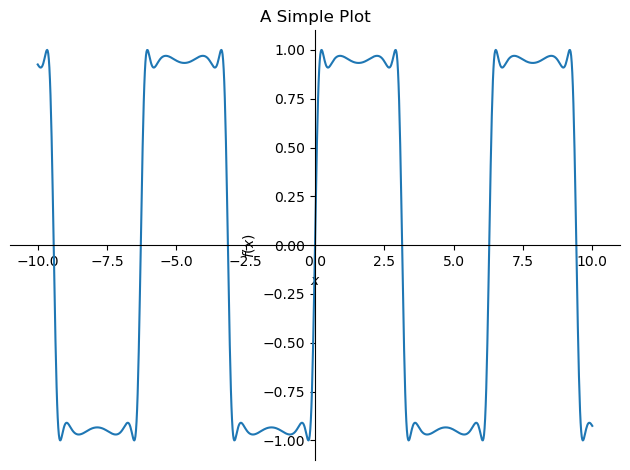

In [46]:
f = sin(2 * sin(2 * sin(2 * sin(x))))
p = plot(f, (x, -10, 10), show=False)
p.title = 'A Simple Plot'
p.show()

Similar to Matplotlib, SymPy provides an interface to customize the graph

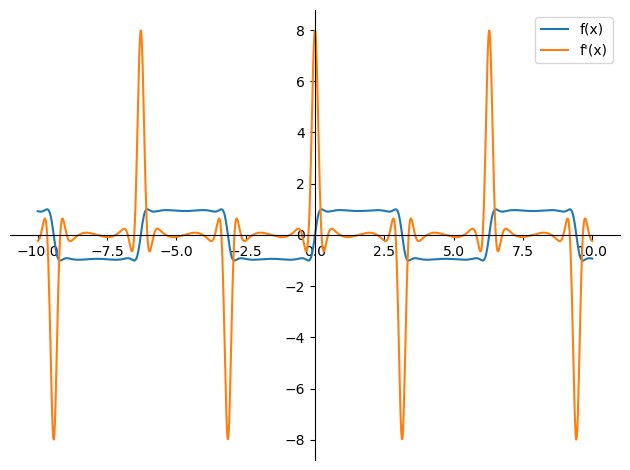

In [47]:
plot_f = plot(f, (x, -10, 10), 
              xlabel='', ylabel='', 
              legend = True, show = False)
plot_f[0].label = 'f(x)'
df = diff(f)
plot_df = plot(df, (x, -10, 10), 
            legend = True, show = False)
plot_df[0].label = 'f\'(x)'
plot_f.append(plot_df[0])
plot_f.show()

It also supports plotting implicit functions and visualizing inequalities

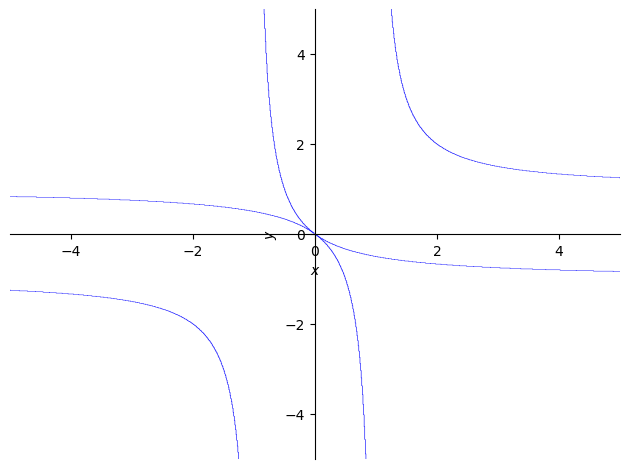

In [48]:
p = plot_implicit(Eq((1/x + 1/y)**2, 1))

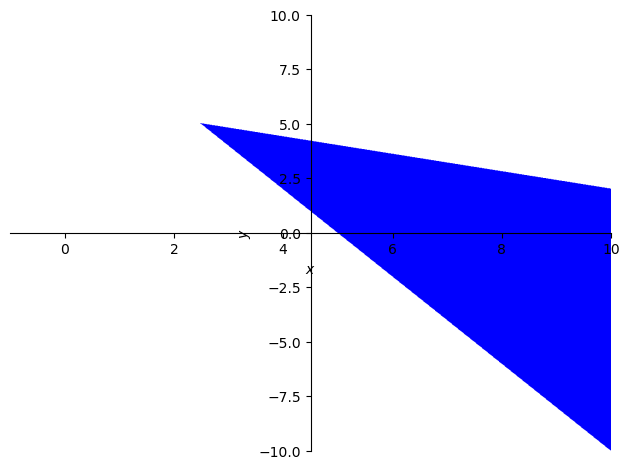

In [49]:
p = plot_implicit(And(2*x + 5*y <= 30, 4*x + 2*y >= 20),
                     (x, -1, 10), (y, -10, 10))

and visualizations in three-dimensional space

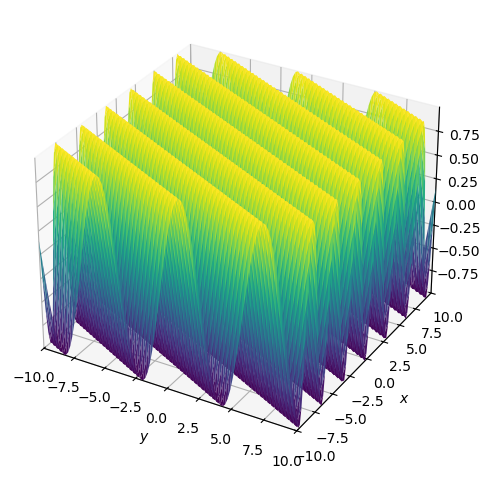

In [50]:
p = plot3d(cos(2*x + y), zlabel='')

## Application: Two-person Exchange Economy

Imagine a pure exchange economy with two people ($a$ and $b$) and two goods recorded as proportions ($x$ and $y$).

They can trade goods with each other according to their preferences.

Assume that the utility functions of the consumers are given by

$$
u_a(x, y) = x^{\alpha} y^{1-\alpha}
$$

$$
u_b(x, y) = (1 - x)^{\beta} (1 - y)^{1-\beta}
$$

where $\alpha, \beta \in (0, 1)$.

First we define the symbols and utility functions

In [51]:
# Define symbols and utility functions
x, y, α, β = symbols('x, y, α, β')
u_a = x**α * y**(1-α)
u_b = (1 - x)**β * (1 - y)**(1 - β)

In [52]:
u_a

 α  1 - α
x ⋅y     

In [53]:
u_b

       β        1 - β
(1 - x) ⋅(1 - y)     

We are interested in the Pareto optimal allocation of goods $x$ and $y$.

Note that a point is Pareto efficient when the allocation is optimal for one person given the allocation for the other person.

In terms of marginal utility:

$$
\frac{\frac{\partial u_a}{\partial x}}{\frac{\partial u_a}{\partial y}} = \frac{\frac{\partial u_b}{\partial x}}{\frac{\partial u_b}{\partial y}}
$$

In [54]:
# A point is Pareto efficient when the allocation is optimal 
# for one person given the allocation for the other person

pareto = Eq(diff(u_a, x)/diff(u_a, y), 
            diff(u_b, x)/diff(u_b, y))
pareto

   1 - α  α - 1                       1 - β        β - 1 
y⋅y     ⋅y     ⋅α   -β⋅(1 - y)⋅(1 - y)     ⋅(1 - y)      
───────────────── = ─────────────────────────────────────
    x⋅(1 - α)                  (1 - x)⋅(β - 1)           

In [55]:
# Solve the equation
sol = solve(pareto, y)[0]
sol

    x⋅β⋅(α - 1)    
───────────────────
x⋅α - x⋅β + α⋅β - α

Let's compute the Pareto optimal allocations of the economy (contract curves) with $\alpha = \beta = 0.5$ using SymPy

In [56]:
# Substitute α = 0.5 and β = 0.5
sol.subs({α: 0.5, β: 0.5})

1.0⋅x

We can use this result to visualize more contract curves under different parameters

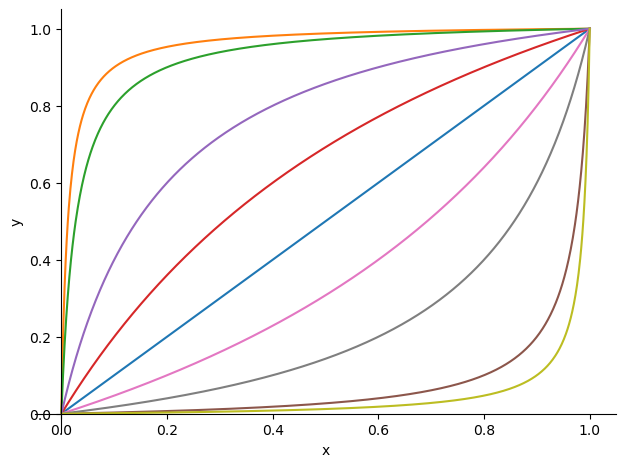

In [57]:
# Plot a range of αs and βs
params = [{α: 0.5, β: 0.5}, 
          {α: 0.1, β: 0.9},
          {α: 0.1, β: 0.8},
          {α: 0.8, β: 0.9},
          {α: 0.4, β: 0.8}, 
          {α: 0.8, β: 0.1},
          {α: 0.9, β: 0.8},
          {α: 0.8, β: 0.4},
          {α: 0.9, β: 0.1}]

p = plot(xlabel='x', ylabel='y', show=False)

for param in params:
    p_add = plot(sol.subs(param), (x, 0, 1), 
                 show=False)
    p.append(p_add[0])
p.show()

We invite you to play with the parameters and see how the contract curves change and think about the following two questions:

- Can you think of a way to draw the same graph using `numpy`? 
- How difficult will it be to write a `numpy` implementation?

## Exercises

```{exercise}
:label: sympy_ex1

L'Hôpital's rule states that for two functions $f(x)$ and $g(x)$, if $\lim_{x \to a} f(x) = \lim_{x \to a} g(x) = 0$ or $\pm \infty$, then

$$
\lim_{x \to a} \frac{f(x)}{g(x)} = \lim_{x \to a} \frac{f'(x)}{g'(x)}
$$

Use SymPy to verify L'Hôpital's rule for the following functions

$$
f(x) = \frac{y^x - 1}{x}
$$

as $x$ approaches to $0$
```

```{solution-start} sympy_ex1
:class: dropdown
```

Let's define the function first

In [58]:
f_upper = y**x - 1
f_lower = x
f = f_upper/f_lower
f

 x    
y  - 1
──────
  x   

Sympy is smart enough to solve this limit

In [59]:
lim = limit(f, x, 0)
lim

log(y)

We compare the result suggested by L'Hôpital's rule

In [60]:
lim = limit(diff(f_upper, x)/
            diff(f_lower, x), x, 0)
lim

log(y)

```{solution-end}
```

```{exercise}
:label: sympy_ex2

[Maximum likelihood estimation (MLE)](https://python.quantecon.org/mle.html) is a method to estimate the parameters of a statistical model. 

It usually involves maximizing a log-likelihood function and solving the first-order derivative.

The binomial distribution is given by

$$
f(x; n, θ) = \frac{n!}{x!(n-x)!}θ^x(1-θ)^{n-x}
$$

where $n$ is the number of trials and $x$ is the number of successes.

Assume we observed a series of binary outcomes with $x$ successes out of $n$ trials.

Compute the MLE of $θ$ using SymPy
```

```{solution-start} sympy_ex2
:class: dropdown
```

First, we define the binomial distribution

In [61]:
n, x, θ = symbols('n x θ')

binomial_factor = (factorial(n)) / (factorial(x)*factorial(n-r))
binomial_factor

    n!     
───────────
x!⋅(n - r)!

In [62]:
bino_dist = binomial_factor * ((θ**x)*(1-θ)**(n-x))
bino_dist

 x        n - x   
θ ⋅(1 - θ)     ⋅n!
──────────────────
   x!⋅(n - r)!    

Now we compute the log-likelihood function and solve for the result

In [63]:
log_bino_dist = log(bino_dist)

In [64]:
log_bino_diff = simplify(diff(log_bino_dist, θ))
log_bino_diff

 -x - 1        -n + x - 1 ⎛   x        n - x + 1    x + 1        n - x        ⎞
θ      ⋅(1 - θ)          ⋅⎝x⋅θ ⋅(1 - θ)          - θ     ⋅(1 - θ)     ⋅(n - x)⎠

In [65]:
solve(Eq(log_bino_diff, 0), θ)[0]

x
─
n

```{solution-end}
```